In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

from glob import glob
import seaborn as sns

from PIL import Image
np.random.seed(123)

from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

import shutil
import itertools

from numpy.random import seed
seed(101)
import tensorflow as tf
tf.compat.v1.set_random_seed(101)

import pandas as pd
import numpy as np
import keras
from keras import backend as K
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
root_path = '/kaggle/input/'
train_path = '/kaggle/input/isic-2019-challenge/ISIC_2019_Training_Input/ISIC_2019_Training_Input'

In [6]:
# Set base directory for working directory
base_dir = '/kaggle/working/'


# Create directories for 9 Diagnostic Categories of Skin Cancer
# Melanoma -> MEL
# Melanocytic nevus -> NV
# Basal cell carcinoma -> BCC
# Actinic keratosis -> AK
# Benign keratosis (solar lentigo / seborrheic keratosis / lichen planus-like keratosis) -> BKL
# Dermatofibroma -> DF
# Vascular lesion -> VASC
# Squamous cell carcinoma -> SCC
# None of the others -> UNK
# train_dir
train_dir = os.path.join(base_dir, 'train_dir')
os.mkdir(train_dir)


val_dir = os.path.join(base_dir, 'val_dir')
os.mkdir(val_dir)

nv = os.path.join(train_dir, 'NV')
os.mkdir(nv)
mel = os.path.join(train_dir, 'MEL')
os.mkdir(mel)
bkl = os.path.join(train_dir, 'BKL')
os.mkdir(bkl)
bcc = os.path.join(train_dir, 'BCC')
os.mkdir(bcc)
akiec = os.path.join(train_dir, 'AK')
os.mkdir(akiec)
vasc = os.path.join(train_dir, 'VASC')
os.mkdir(vasc)
df = os.path.join(train_dir, 'DF')
os.mkdir(df)
df = os.path.join(train_dir, 'SCC')
os.mkdir(df)
df = os.path.join(train_dir, 'UNK')
os.mkdir(df)

# Create subdirectories for each category in val_dir
nv = os.path.join(val_dir, 'NV')
os.mkdir(nv)
mel = os.path.join(val_dir, 'MEL')
os.mkdir(mel)
bkl = os.path.join(val_dir, 'BKL')
os.mkdir(bkl)
bcc = os.path.join(val_dir, 'BCC')
os.mkdir(bcc)
akiec = os.path.join(val_dir, 'AK')
os.mkdir(akiec)
vasc = os.path.join(val_dir, 'VASC')
os.mkdir(vasc)
df = os.path.join(val_dir, 'DF')
os.mkdir(df)
df = os.path.join(val_dir, 'SCC')
os.mkdir(df)
df = os.path.join(val_dir, 'UNK')
os.mkdir(df)

# **Meta Data**

In [228]:
metadata_path = '/kaggle/input/isic-2019-challenge/ISIC_2019_Training_Metadata.csv'
df_meta = pd.read_csv(metadata_path)
print('              Training Meta Data')
df_meta.head()

              Training Meta Data


,image,age_approx,anatom_site_general,lesion_id,sex
0,ISIC_0000000,55.0,anterior torso,NaN,female
1,ISIC_0000001,30.0,anterior torso,NaN,female
2,ISIC_0000002,60.0,upper extremity,NaN,female
3,ISIC_0000003,30.0,upper extremity,NaN,male
4,ISIC_0000004,80.0,posterior torso,NaN,male


In [229]:
gt_path = '/kaggle/input/isic-2019-challenge/ISIC_2019_Training_GroundTruth.csv'
df_gt = pd.read_csv(gt_path)
print('              Training Ground Truth')
df_gt.head()

              Training Ground Truth


,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [230]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25331 entries, 0 to 25330
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   image                25331 non-null  object 
 1   age_approx           24894 non-null  float64
 2   anatom_site_general  22700 non-null  object 
 3   lesion_id            23247 non-null  object 
 4   sex                  24947 non-null  object 
dtypes: float64(1), object(4)
memory usage: 989.6+ KB


In [231]:
# 1. Summary Statistics
summary_stats = df_meta.describe()
print(summary_stats)

         age_approx
count  24894.000000
mean      54.028481
std       18.130971
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max       85.000000


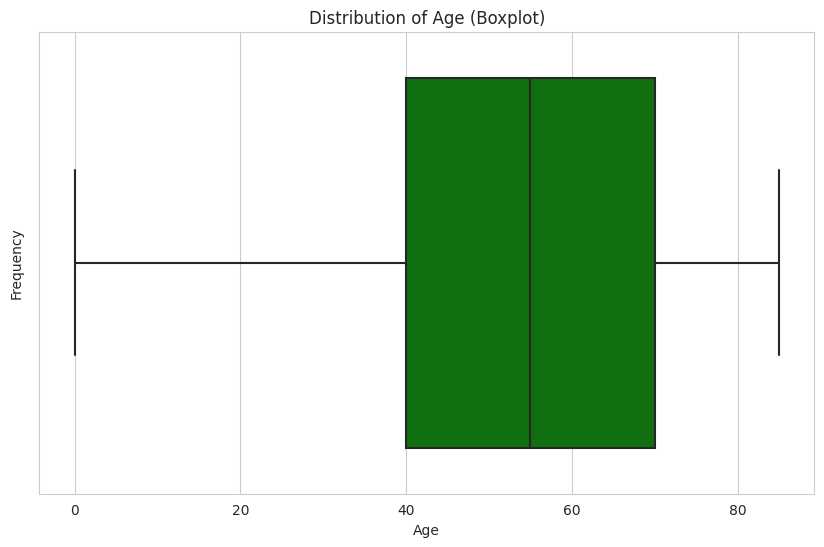

In [232]:
# Set the style
sns.set_style("whitegrid")

# Plot the boxplot of 'age_approx' with seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_meta['age_approx'], color='green')
plt.title('Distribution of Age (Boxplot)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

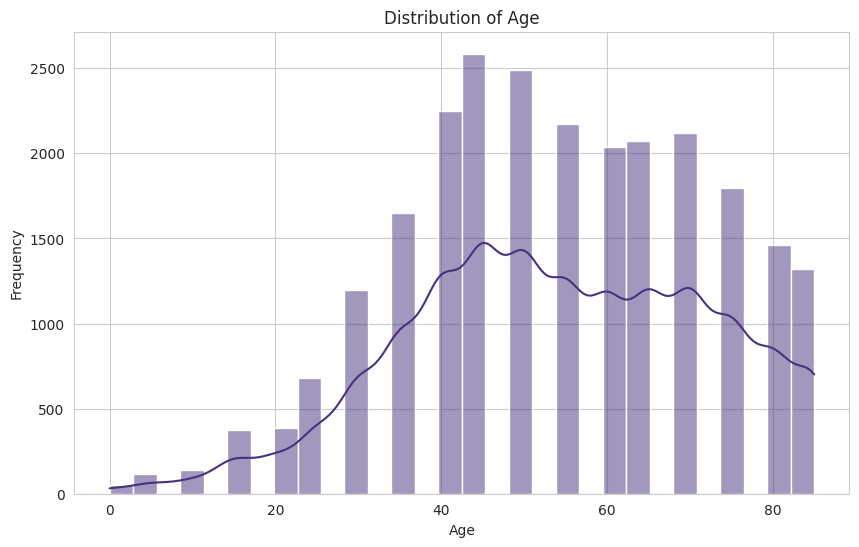

In [233]:
# 2. Data Distribution Analysis
colors = sns.color_palette('viridis')
plt.figure(figsize=(10, 6))
sns.histplot(df_meta['age_approx'], bins=30, kde=True, color=colors[0])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


### plt.figure(figsize=(8, 4))
df_meta['anatom_site_general'].value_counts().plot(kind='bar', color=colors[1])
plt.title('Distribution of anatom_site_general ')

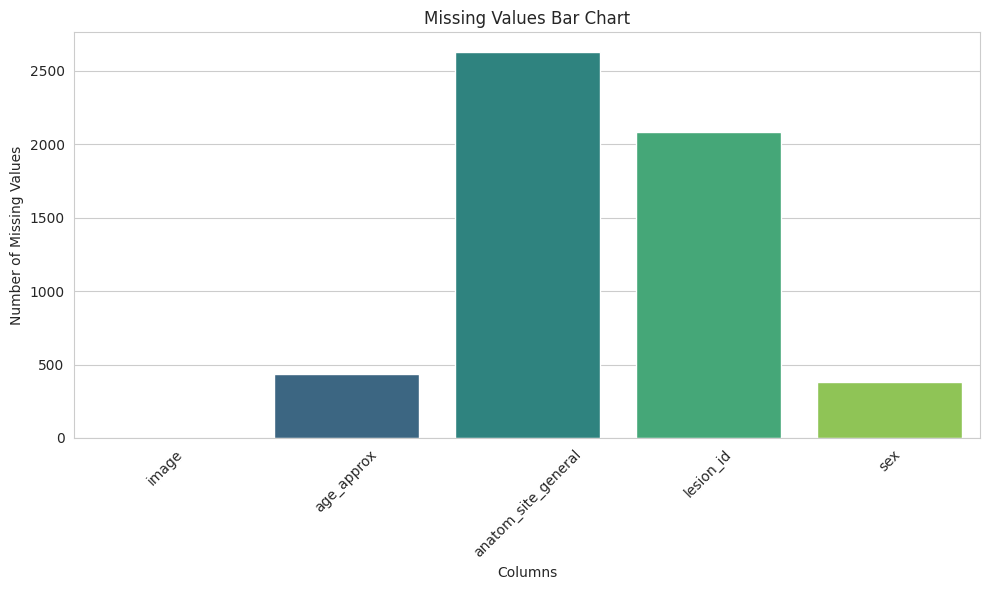

In [234]:
# Calculate missing values
missing_values = df_meta.isnull().sum()

# Plot missing values in a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')
plt.title('Missing Values Bar Chart')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [235]:
df_meta.isnull().sum().sum()

5536

In [236]:
df_meta['lesion_id'].isnull().sum()

2084

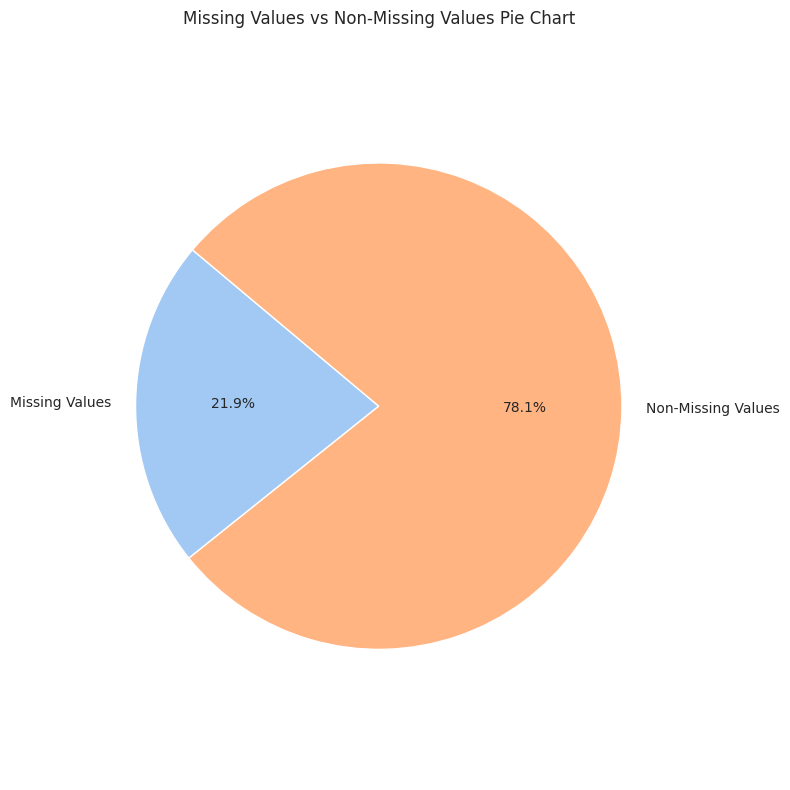

In [237]:
# Calculate missing values
missing_values = df_meta.isnull().sum().sum()

# Calculate total count of data
total_count = df_meta.shape[0]  # Number of rows in the DataFrame

# Calculate percentage of missing values
missing_percentage = (missing_values / total_count) * 100

# Calculate percentage of non-missing values
non_missing_percentage = 100 - missing_percentage

# Plot missing values and non-missing values in a pie chart
labels = ['Missing Values', 'Non-Missing Values']
sizes = [missing_percentage.sum(), non_missing_percentage.sum()]
colors = sns.color_palette('pastel')

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Missing Values vs Non-Missing Values Pie Chart')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

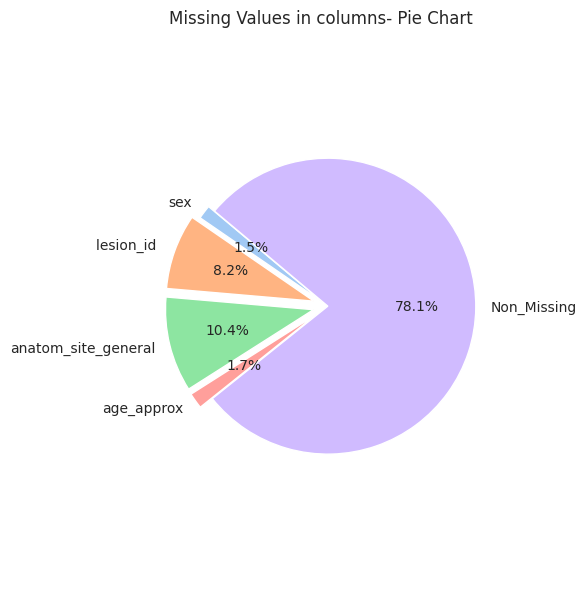

In [238]:
# Calculate missing values
missing_values_Lid = df_meta['lesion_id'].isnull().sum()
missing_values_anatom_site  = df_meta['anatom_site_general'].isnull().sum()
missing_values_age = df_meta['age_approx'].isnull().sum()
missing_value_sex = df_meta['sex'].isnull().sum()
# Calculate total count of data
total_count = df_meta.shape[0]  # Number of rows in the DataFrame

# Calculate percentage of missing values
missing_values_Lid = (missing_values_Lid / total_count) * 100
missing_values_anatom_site = (missing_values_anatom_site / total_count) * 100
missing_values_age = (missing_values_age / total_count) * 100
missing_value_sex = (missing_value_sex / total_count) * 100
Non_Missing = 100 - missing_values_Lid -missing_values_anatom_site-missing_values_age-missing_value_sex

# Plot missing values and non-missing values in a pie chart
labels = ['sex','lesion_id ', 
          'anatom_site_general',
          'age_approx'
         ,'Non_Missing']
sizes = [missing_value_sex, missing_values_Lid, 
          missing_values_anatom_site,
          missing_values_age
         ,Non_Missing]
colors = sns.color_palette('pastel')

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140
        ,explode=[0.05,0.1,0.1,0.1,0])
plt.title('Missing Values in columns- Pie Chart')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

In [239]:
df = pd.concat([df_meta, df_gt], axis=1, join='inner')
df.head()

,image,age_approx,anatom_site_general,lesion_id,sex,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,55.0,anterior torso,NaN,female,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,30.0,anterior torso,NaN,female,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,60.0,upper extremity,NaN,female,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,30.0,upper extremity,NaN,male,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,80.0,posterior torso,NaN,male,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [240]:
df.isnull().sum()

image                     0
age_approx              437
anatom_site_general    2631
lesion_id              2084
sex                     384
image                     0
MEL                       0
NV                        0
BCC                       0
AK                        0
BKL                       0
DF                        0
VASC                      0
SCC                       0
UNK                       0
dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Age Vs Anatom_site_general ')

<Figure size 1500x400 with 0 Axes>

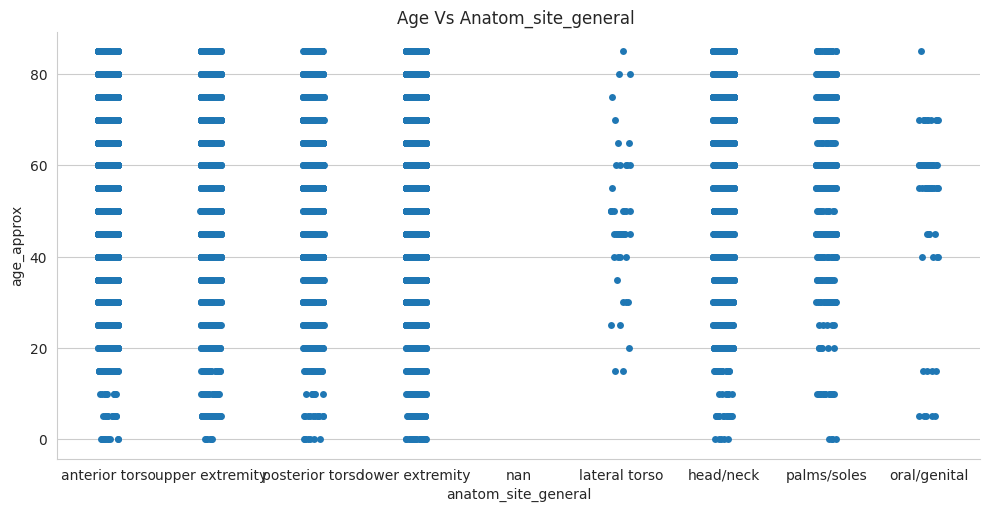

In [241]:
plt.figure(figsize=(15, 4))
sns.catplot(data=df_meta, x="anatom_site_general", y="age_approx",height=5, aspect=2)
plt.title('Age Vs Anatom_site_general ')

In [242]:
df['age_approx'].fillna((df['age_approx'].mean()), inplace=True)

In [243]:
df.drop(['image','lesion_id'], axis=1, inplace = True)

In [244]:
df_meta.dropna(subset=['anatom_site_general', 'sex'], inplace=True)
df_meta.isnull().sum()

image                     0
age_approx               51
anatom_site_general       0
lesion_id              1215
sex                       0
dtype: int64

In [245]:
df.dropna(subset=['anatom_site_general', 'sex'], inplace=True)
df.isnull().sum()

age_approx             0
anatom_site_general    0
sex                    0
MEL                    0
NV                     0
BCC                    0
AK                     0
BKL                    0
DF                     0
VASC                   0
SCC                    0
UNK                    0
dtype: int64

In [246]:
df.head()

,age_approx,anatom_site_general,sex,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,55.0,anterior torso,female,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,30.0,anterior torso,female,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60.0,upper extremity,female,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30.0,upper extremity,male,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,80.0,posterior torso,male,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [247]:
df_meta.columns

Index(['image', 'age_approx', 'anatom_site_general', 'lesion_id', 'sex'], dtype='object')

In [248]:
df_meta['sex'].unique()


array(['female', 'male'], dtype=object)

In [249]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [250]:
df_meta['anatom_site_general'].unique()

array(['anterior torso', 'upper extremity', 'posterior torso',
       'lower extremity', 'lateral torso', 'head/neck', 'palms/soles',
       'oral/genital'], dtype=object)

In [251]:
df['anatom_site_general'].unique()

array(['anterior torso', 'upper extremity', 'posterior torso',
       'lower extremity', 'lateral torso', 'head/neck', 'palms/soles',
       'oral/genital'], dtype=object)

In [252]:
df_new = df.copy()

In [253]:
import pandas as pd

# Assuming you have a DataFrame named df_meta

# Specify the columns to one-hot encode
columns_to_encode = ['sex', 'anatom_site_general']

# Use the get_dummies function to perform one-hot encoding
df = pd.get_dummies(df, columns=columns_to_encode)
df

,age_approx,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,sex_female,sex_male,anatom_site_general_anterior torso,anatom_site_general_head/neck,anatom_site_general_lateral torso,anatom_site_general_lower extremity,anatom_site_general_oral/genital,anatom_site_general_palms/soles,anatom_site_general_posterior torso,anatom_site_general_upper extremity
0,55.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False,True,False,False,False,False,False,False,False
1,30.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False,True,False,False,False,False,False,False,False
2,60.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False,False,False,False,False,False,False,False,True
3,30.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,True,False,False,False,False,False,False,False,True
4,80.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25326,85.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False,False,True,False,False,False,False,False,False
25327,65.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,False,True,True,False,False,False,False,False,False,False
25328,70.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,True,False,False,False,True,False,False,False,False
25329,55.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False,False,False,False,False,False,True,False,False


In [254]:
df_meta


,image,age_approx,anatom_site_general,lesion_id,sex
0,ISIC_0000000,55.0,anterior torso,NaN,female
1,ISIC_0000001,30.0,anterior torso,NaN,female
2,ISIC_0000002,60.0,upper extremity,NaN,female
3,ISIC_0000003,30.0,upper extremity,NaN,male
4,ISIC_0000004,80.0,posterior torso,NaN,male
...,...,...,...,...,...
25326,ISIC_0073247,85.0,head/neck,BCN_0003925,female
25327,ISIC_0073248,65.0,anterior torso,BCN_0001819,male
25328,ISIC_0073249,70.0,lower extremity,BCN_0001085,male
25329,ISIC_0073251,55.0,palms/soles,BCN_0002083,female


In [255]:
meta_labels = df[['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC', 'UNK']].copy()
meta_train = df.drop(columns=['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC', 'UNK'],axis=1)


In [256]:
meta_train

,age_approx,sex_female,sex_male,anatom_site_general_anterior torso,anatom_site_general_head/neck,anatom_site_general_lateral torso,anatom_site_general_lower extremity,anatom_site_general_oral/genital,anatom_site_general_palms/soles,anatom_site_general_posterior torso,anatom_site_general_upper extremity
0,55.0,True,False,True,False,False,False,False,False,False,False
1,30.0,True,False,True,False,False,False,False,False,False,False
2,60.0,True,False,False,False,False,False,False,False,False,True
3,30.0,False,True,False,False,False,False,False,False,False,True
4,80.0,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
25326,85.0,True,False,False,True,False,False,False,False,False,False
25327,65.0,False,True,True,False,False,False,False,False,False,False
25328,70.0,False,True,False,False,False,True,False,False,False,False
25329,55.0,True,False,False,False,False,False,False,True,False,False


In [257]:
meta_labels

,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
25326,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25327,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25328,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25329,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [258]:
new_df = pd.concat([new_df, df_cell_type], axis=1, join='inner')
new_df.head()

,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,anatom_site_general_anterior torso,anatom_site_general_head/neck,anatom_site_general_lateral torso,anatom_site_general_lower extremity,anatom_site_general_oral/genital,anatom_site_general_palms/soles,anatom_site_general_posterior torso,anatom_site_general_upper extremity,dx,dx,dx
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False,False,False,False,False,False,False,NV,NV,NV
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False,False,False,False,False,False,False,NV,NV,NV
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,True,MEL,MEL,MEL
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,True,NV,NV,NV
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,True,False,MEL,MEL,MEL


In [259]:
new_df.columns

Index(['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC',
       'anatom_site_general_anterior torso', 'anatom_site_general_head/neck',
       'anatom_site_general_lateral torso',
       'anatom_site_general_lower extremity',
       'anatom_site_general_oral/genital', 'anatom_site_general_palms/soles',
       'anatom_site_general_posterior torso',
       'anatom_site_general_upper extremity', 'dx', 'dx', 'dx'],
      dtype='object')

In [262]:
df_meta

,image,age_approx,anatom_site_general,lesion_id,sex
0,ISIC_0000000,55.0,anterior torso,NaN,female
1,ISIC_0000001,30.0,anterior torso,NaN,female
2,ISIC_0000002,60.0,upper extremity,NaN,female
3,ISIC_0000003,30.0,upper extremity,NaN,male
4,ISIC_0000004,80.0,posterior torso,NaN,male
...,...,...,...,...,...
25326,ISIC_0073247,85.0,head/neck,BCN_0003925,female
25327,ISIC_0073248,65.0,anterior torso,BCN_0001819,male
25328,ISIC_0073249,70.0,lower extremity,BCN_0001085,male
25329,ISIC_0073251,55.0,palms/soles,BCN_0002083,female


# **Images**

In [265]:
df_cell_type = pd.DataFrame([x for x in np.where(df_gt == 1, df_gt.columns,'').flatten().tolist() if len(x) > 0], columns= (["dx"]))

In [266]:
meta = pd.read_csv(metadata_path)
df = pd.concat([meta, df_cell_type], axis=1, join='inner')
df.head()

,image,age_approx,anatom_site_general,lesion_id,sex,dx
0,ISIC_0000000,55.0,anterior torso,NaN,female,NV
1,ISIC_0000001,30.0,anterior torso,NaN,female,NV
2,ISIC_0000002,60.0,upper extremity,NaN,female,MEL
3,ISIC_0000003,30.0,upper extremity,NaN,male,NV
4,ISIC_0000004,80.0,posterior torso,NaN,male,MEL


In [267]:
meta = pd.read_csv(metadata_path)
df_new = pd.concat([df_new, df_cell_type], axis=1, join='inner')
df_new.head()

,age_approx,anatom_site_general,sex,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,dx
0,55.0,anterior torso,female,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV
1,30.0,anterior torso,female,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV
2,60.0,upper extremity,female,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MEL
3,30.0,upper extremity,male,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV
4,80.0,posterior torso,male,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MEL


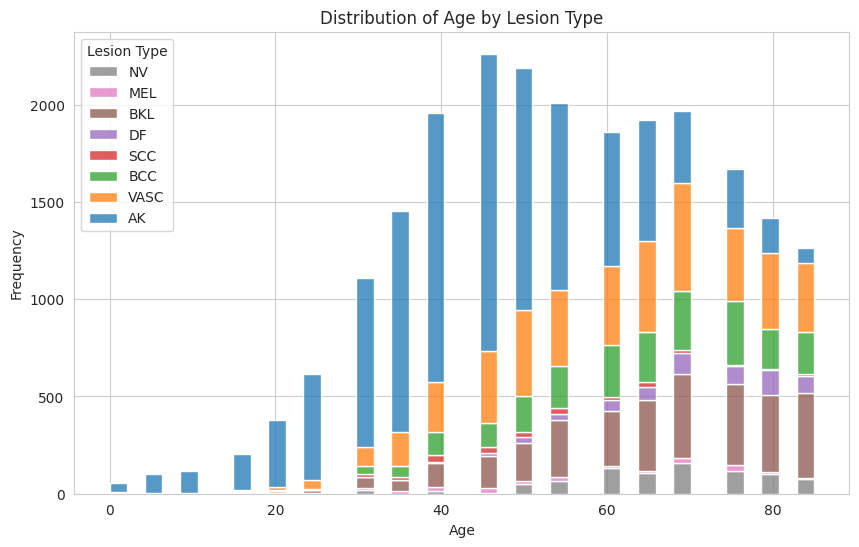

In [282]:
colors = sns.color_palette('tab10', n_colors=len(df_new['dx'].unique()))
plt.figure(figsize=(10, 6))
sns.histplot(df_new, x='age_approx', bins=40, kde=False, palette=colors, hue='dx', multiple='stack')
plt.title('Distribution of Age by Lesion Type')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Lesion Type', labels=df_new['dx'].unique())  # Set legend labels based on unique values of 'dx'plt.tight_layout()
plt.show()

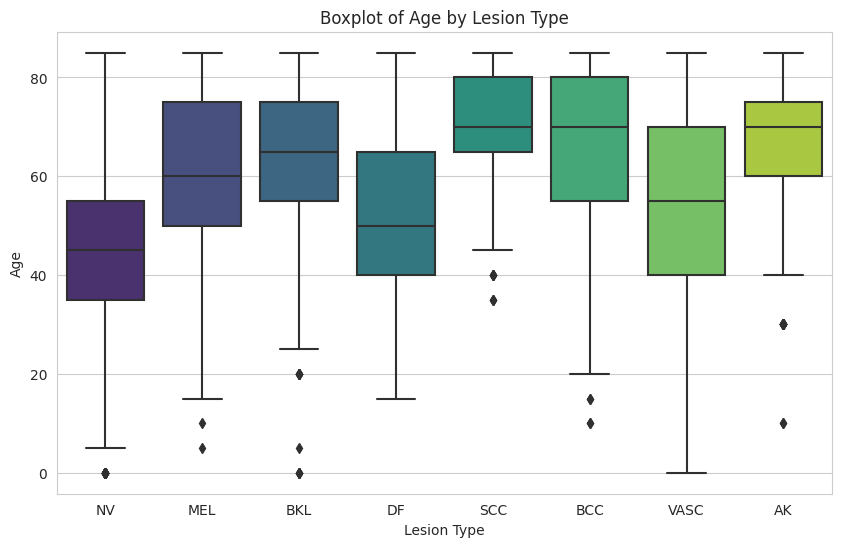

In [285]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_new, x='dx', y='age_approx', palette='viridis')
plt.title('Boxplot of Age by Lesion Type')
plt.xlabel('Lesion Type')
plt.ylabel('Age')
plt.show()

In [211]:
df_new = df_new[['anatom_site_general','dx']

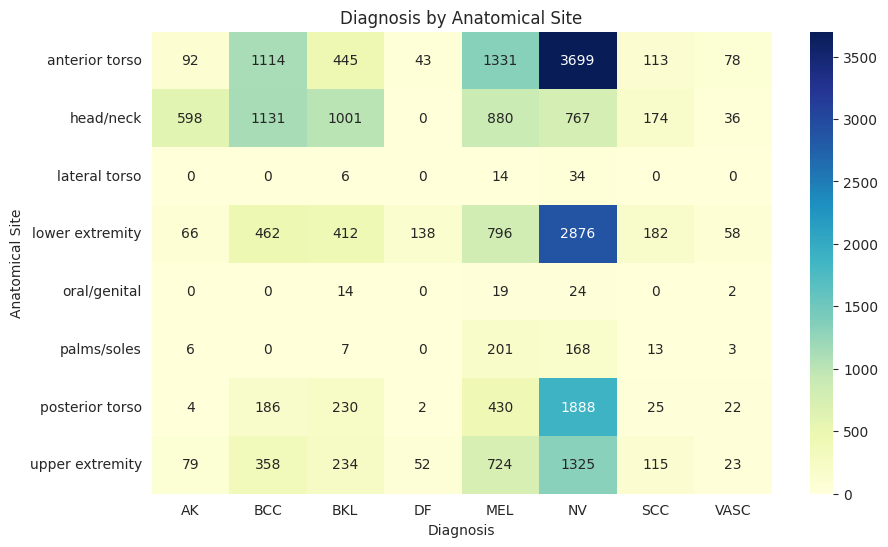

In [214]:
pivot_df = df.pivot_table(index='anatom_site_general', columns='dx',
                          aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Diagnosis by Anatomical Site')
plt.xlabel('Diagnosis')
plt.ylabel('Anatomical Site')
plt.show()

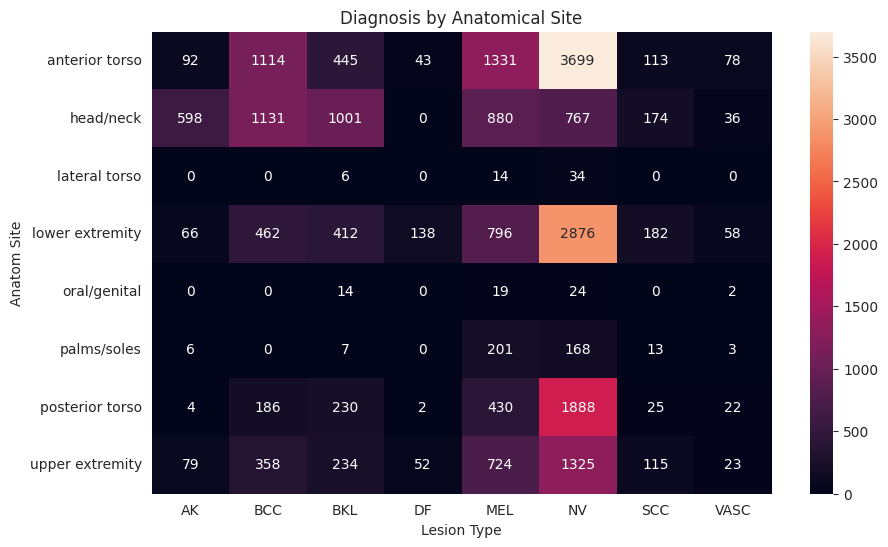

In [218]:
# Grouping by 'anatom_site_general' and 'dx', and then counting occurrences
grouped = df.groupby(['anatom_site_general', 'dx']).size().unstack(fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(grouped, annot=True, fmt='g')
plt.title('Diagnosis by Anatomical Site')
plt.xlabel('Lesion Type')
plt.ylabel('Anatom Site')
plt.show()


In [65]:
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(root_path, '*', '*.jpg'))}

lesion_type_dict = {
    'NV': 'Melanocytic nevi',
    'MEL': 'Melanoma',
    'BKL': 'Benign keratosis-like lesions ',
    'BCC': 'Basal cell carcinoma',
    'AK': 'Actinic keratoses',
    'VASC': 'Vascular lesions',
    'DF': 'Dermatofibroma',
    'SCC': 'Squamous cell carcinoma',
    'UNK': 'None of the others'
}






df['path'] = df['image'].map(imageid_path_dict.get)
df['cell_type'] = df['dx'].map(lesion_type_dict.get) 
df['cell_type_idx'] = pd.Categorical(df['cell_type']).codes

df.tail()

,image,age_approx,anatom_site_general,lesion_id,sex,dx,path,cell_type,cell_type_idx
25326,ISIC_0073247,85.0,head/neck,BCN_0003925,female,BCC,None,Basal cell carcinoma,1
25327,ISIC_0073248,65.0,anterior torso,BCN_0001819,male,BKL,None,Benign keratosis-like lesions,2
25328,ISIC_0073249,70.0,lower extremity,BCN_0001085,male,MEL,None,Melanoma,5
25329,ISIC_0073251,55.0,palms/soles,BCN_0002083,female,NV,None,Melanocytic nevi,4
25330,ISIC_0073254,50.0,upper extremity,BCN_0001079,male,BKL,None,Benign keratosis-like lesions,2


In [66]:
df_ = df.groupby('lesion_id').count()

df_ = df_[df_['image'] == 1]

df_.reset_index(inplace=True)

df_.head()

,lesion_id,image,age_approx,anatom_site_general,sex,dx,path,cell_type,cell_type_idx
0,BCN_0000013,1,1,1,1,1,0,1,1
1,BCN_0000020,1,1,1,1,1,0,1,1
2,BCN_0000039,1,1,1,1,1,0,1,1
3,BCN_0000053,1,1,1,1,1,0,1,1
4,BCN_0000059,1,1,1,1,1,0,1,1


In [67]:
def identify_duplicates(x):
    
    unique_list = list(df_['lesion_id'])
    
    if x in unique_list:
        return 'no_duplicates'
    else:
        return 'has_duplicates'
    
# create a new colum that is a copy of the lesion_id column
df['duplicates'] = df['lesion_id']
# apply the function to this new column
df['duplicates'] = df['duplicates'].apply(identify_duplicates)
df.tail()

,image,age_approx,anatom_site_general,lesion_id,sex,dx,path,cell_type,cell_type_idx,duplicates
25326,ISIC_0073247,85.0,head/neck,BCN_0003925,female,BCC,None,Basal cell carcinoma,1,has_duplicates
25327,ISIC_0073248,65.0,anterior torso,BCN_0001819,male,BKL,None,Benign keratosis-like lesions,2,has_duplicates
25328,ISIC_0073249,70.0,lower extremity,BCN_0001085,male,MEL,None,Melanoma,5,has_duplicates
25329,ISIC_0073251,55.0,palms/soles,BCN_0002083,female,NV,None,Melanocytic nevi,4,has_duplicates
25330,ISIC_0073254,50.0,upper extremity,BCN_0001079,male,BKL,None,Benign keratosis-like lesions,2,has_duplicates


In [68]:

df_ = df[df['duplicates'] == 'no_duplicates']

df_.shape

(6788, 10)

In [69]:
y = df_['dx']

_, df_val = train_test_split(df_, test_size=0.17, random_state=101, stratify=y)

df_val.shape

(1154, 10)

In [70]:
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(root_path, '*', '*.jpg'))}

lesion_type_dict = {
    'NV': 'Melanocytic nevi',
    'MEL': 'Melanoma',
    'BKL': 'Benign keratosis-like lesions ',
    'BCC': 'Basal cell carcinoma',
    'AK': 'Actinic keratoses',
    'VASC': 'Vascular lesions',
    'DF': 'Dermatofibroma',
    'SCC': 'Squamous cell carcinoma',
    'UNK': 'None of the others'
}






df['path'] = df['image'].map(imageid_path_dict.get)
df['cell_type'] = df['dx'].map(lesion_type_dict.get) 
df['cell_type_idx'] = pd.Categorical(df['cell_type']).codes

df.tail()

,image,age_approx,anatom_site_general,lesion_id,sex,dx,path,cell_type,cell_type_idx,duplicates
25326,ISIC_0073247,85.0,head/neck,BCN_0003925,female,BCC,None,Basal cell carcinoma,1,has_duplicates
25327,ISIC_0073248,65.0,anterior torso,BCN_0001819,male,BKL,None,Benign keratosis-like lesions,2,has_duplicates
25328,ISIC_0073249,70.0,lower extremity,BCN_0001085,male,MEL,None,Melanoma,5,has_duplicates
25329,ISIC_0073251,55.0,palms/soles,BCN_0002083,female,NV,None,Melanocytic nevi,4,has_duplicates
25330,ISIC_0073254,50.0,upper extremity,BCN_0001079,male,BKL,None,Benign keratosis-like lesions,2,has_duplicates


In [71]:
def identify_val_rows(x):

    val_list = list(df_val['image'])
    
    if str(x) in val_list:
        return 'val'
    else:
        return 'train'

df['train_or_val'] = df['image']

df['train_or_val'] = df['train_or_val'].apply(identify_val_rows)
   

df_train = df[df['train_or_val'] == 'train']


print(len(df_train))
print(len(df_val))

24177
1154


In [72]:
df.set_index('image', inplace=True)

In [ ]:
df

In [ ]:
folder = os.listdir(train_path)

train_list = list(df_train['image'])
val_list = list(df_val['image'])



for image in train_list:
    
    fname = str(image) + '.jpg'
    label = df.loc[image,'dx']
    
    if fname in folder:
        src = os.path.join(train_path, fname)
        dst = os.path.join(train_dir, label, fname)
        shutil.copyfile(src, dst)


for image in val_list:
    
    fname = str(image) + '.jpg'
    label = df.loc[image,'dx']
    
    if fname in folder:
        src = os.path.join(train_path, fname)
        dst = os.path.join(val_dir, label, fname)
        shutil.copyfile(src, dst)

In [ ]:
class_list = ['MEL', 'BKL', 'BCC', 'AK', 'VASC', 'DF', 'SCC']

for item in class_list:
    

    aug_dir = 'aug_dir'
    os.mkdir(aug_dir)

    img_dir = os.path.join(aug_dir, 'img_dir')
    os.mkdir(img_dir)

    img_class = item


    img_list = os.listdir('/kaggle/working/train_dir/' + img_class)

    for fname in img_list:
            src = os.path.join('/kaggle/working/train_dir/' + img_class, fname)
            dst = os.path.join(img_dir, fname)
            shutil.copyfile(src, dst)


    path = aug_dir
    save_path = '/kaggle/working/train_dir/' + img_class

    datagen = ImageDataGenerator(
        rotation_range=180,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

    batch_size = 50

    aug_datagen = datagen.flow_from_directory(path,
                                           save_to_dir=save_path,
                                           save_format='jpg',
                                                    target_size=(224,224),
                                                    batch_size=batch_size)


    
    num_aug_images_wanted = 9200 

    num_files = len(os.listdir(img_dir))
    num_batches = int(np.ceil((num_aug_images_wanted-num_files)/batch_size))

    for i in range(0,num_batches):

        imgs, labels = next(aug_datagen)
        
    shutil.rmtree('aug_dir')

In [ ]:
train_path = '/kaggle/working/train_dir'
valid_path = '/kaggle/working/val_dir'

num_train_samples = len(df_train)
num_val_samples = len(df_val)

train_batch_size = 20
val_batch_size = 20

# image_size = 224
image_size = 299

train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)

In [ ]:
datagen = ImageDataGenerator(
    preprocessing_function= \
    keras.applications.xception.preprocess_input)

train_batches = datagen.flow_from_directory(train_path,
                                            target_size=(image_size,image_size),
                                            batch_size=train_batch_size)

valid_batches = datagen.flow_from_directory(valid_path,
                                            target_size=(image_size,image_size),
                                            batch_size=val_batch_size)

test_batches = datagen.flow_from_directory(valid_path,
                                            target_size=(image_size,image_size),
                                            batch_size=1,
                                            shuffle=False)

In [ ]:
metadata_branch = Dense(input,128, activation='relu')(meta_train)

In [ ]:
mobile = keras.applications.xception.Xception()

In [ ]:
from tensorflow.keras.layers import Input, Dense, Concatenate
x = mobile.layers[-2].output
x = Dropout(0.25)(x)
combined = Concatenate()([metadata_branch, x])
predictions = Dense(9, activation='softmax')(combined)

model = Model(inputs=mobile.input, outputs=predictions)

In [ ]:
for layer in model.layers[:-134]:
    layer.trainable = False

In [ ]:
from keras.metrics import categorical_accuracy, top_k_categorical_accuracy

def top_3_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=3)

def top_2_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=2)

In [ ]:
model.compile(Adam(lr=0.01), loss='categorical_crossentropy', 
              metrics=[categorical_accuracy, top_2_accuracy, top_3_accuracy])

In [ ]:
print(valid_batches.class_indices)

In [ ]:
class_weights = {
    0: 1.0,  # AK
    1: 1.0,  # BCC
    2: 1.0,  # BKL
    3: 1.0,  # DF
    4: 3.0,  # MEL # Try to make the model more sensitive to Melanoma.
    5: 1.0,  # NV
    6: 1.0,  # SCC
    7: 1.0, 
    
    
    
     # UNK
    8: 1.0,  # VASC
}

In [ ]:
filepath = "/kaggle/working/xception-134-trial03.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_top_3_accuracy', verbose=1, 
                             save_best_only=True, mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_top_3_accuracy', factor=0.5, patience=2, 
                                   verbose=1, mode='max', min_lr=0.00001)
                              
callbacks_list = [checkpoint, reduce_lr]

history = model.fit_generator(train_batches, steps_per_epoch=train_steps, 
                              class_weight=class_weights,
                    validation_data=valid_batches,
                    validation_steps=val_steps,
                    epochs=30, verbose=1,
                   callbacks=callbacks_list)

In [ ]:
# get the metric names so we can use evaulate_generator
model.metrics_names

In [ ]:
val_loss, val_cat_acc, val_top_2_acc, val_top_3_acc = \
model.evaluate_generator(test_batches, 
                        steps=len(df_val))

print('val_loss:', val_loss)
print('val_cat_acc:', val_cat_acc)
print('val_top_2_acc:', val_top_2_acc)
print('val_top_3_acc:', val_top_3_acc)

In [ ]:
model.load_weights('/kaggle/working/xception-134-trial03.h5')

val_loss, val_cat_acc, val_top_2_acc, val_top_3_acc = \
model.evaluate_generator(test_batches, 
                        steps=len(df_val))

print('val_loss:', val_loss)
print('val_cat_acc:', val_cat_acc)
print('val_top_2_acc:', val_top_2_acc)
print('val_top_3_acc:', val_top_3_acc)

In [ ]:

import matplotlib.pyplot as plt

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
train_top2_acc = history.history['top_2_accuracy']
val_top2_acc = history.history['val_top_2_accuracy']
train_top3_acc = history.history['top_3_accuracy']
val_top3_acc = history.history['val_top_3_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

plt.plot(epochs, acc, 'bo', label='Training cat acc')
plt.plot(epochs, val_acc, 'b', label='Validation cat acc')
plt.title('Training and validation cat accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, train_top2_acc, 'bo', label='Training top2 acc')
plt.plot(epochs, val_top2_acc, 'b', label='Validation top2 acc')
plt.title('Training and validation top2 accuracy')
plt.legend()
plt.figure()


plt.plot(epochs, train_top3_acc, 'bo', label='Training top3 acc')
plt.plot(epochs, val_top3_acc, 'b', label='Validation top3 acc')
plt.title('Training and validation top3 accuracy')
plt.legend()



plt.show()

In [ ]:
test_labels = test_batches.classes

In [ ]:
test_batches.class_indices

In [ ]:
predictions = model.predict_generator(test_batches, steps=len(df_val), verbose=1)

In [ ]:
predictions.shape

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:
test_labels.shape

In [ ]:
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

In [ ]:
test_batches.class_indices

In [ ]:
cm_plot_labels = ['AK', 'BCC', 'BKL', 'DF', 'MEL','NV', 'SCC', 'VASC']

plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [ ]:
y_pred = np.argmax(predictions, axis=1)
y_true = test_batches.classes

In [ ]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
balanced = balanced_accuracy_score(y_true, y_pred)
print(balanced)
report = classification_report(y_true, y_pred, target_names=cm_plot_labels)
print(report)

In [ ]:
tf.keras.models.save_model(model = model,filepath='/kaggle/working/xception_v0.h5')

In [ ]:
model = tf.keras.models.load_model(filepath='/kaggle/working/xception_v0.h5')